In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:

DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv("twitter dataset.csv", encoding =DATASET_ENCODING , names=DATASET_COLUMNS)
data.head()
X = data.iloc[:,[5]]
Y = data.iloc[:,0]
Y[Y == 4] = 1

C:\Users\Shank\AppData\Local\Temp\ipykernel_18428\1616972089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 4] = 1


In [3]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data.describe()

,target,ids
count,1600000.0,1.600000e+06
mean,0.5,1.998818e+09
std,0.5,1.935761e+08
min,0.0,1.467810e+09
25%,0.0,1.956916e+09
50%,0.5,2.002102e+09
75%,1.0,2.177059e+09
max,1.0,2.329206e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
# Text-preprocessing

# missing values
nums_missing_desc = data.isnull().sum()[2] # no of missing descriptions
print("Number of missing values: " + str(nums_missing_desc))
data = data.dropna()

TAG_CLEANING_RE = r"@\S+"
# Remove @tags
X['text'] = X['text'].map(lambda x: re.sub(TAG_CLEANING_RE, ' ', x))

# Smart lowercase
X['text'] = X['text'].map(lambda x: x.lower())

# Remove numbers
X['text'] = X['text'].map(lambda x: re.sub(r'\d+', ' ', x))

# Remove links
TEXT_CLEANING_RE = r"https?:\S+|http?:\S|[^A-Za-z0-9]+"
X['text'] = X['text'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))

# Remove Punctuation
X['text']  = X['text'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
X['text'] = X['text'].map(lambda x: x.strip())

# Tokenize into words
X['text'] = X['text'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
X['text'] = X['text'].map(lambda x: [word for word in x if word.isalpha()])

# Filter out stop words
stop_words = set(stopwords.words('english'))
X['text'] = X['text'].map(lambda x: [w for w in x if not w in stop_words])
    
# Word Lemmatization
lem = WordNetLemmatizer()
X['text'] = X['text'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
X['text'] = X['text'].map(lambda x: ' '.join(x))

C:\Users\Shank\AppData\Local\Temp\ipykernel_18428\3275774057.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nums_missing_desc = data.isnull().sum()[2] # no of missing descriptions


Number of missing values: 0


In [10]:
X.head()

,text
0,zl awww bummer shoulda get david carr third day
1,upset update facebook texting might cry result...
2,dive many time ball manage save rest go bind
3,whole body feel itchy like fire
4,behave mad see


In [23]:
# Word2Vec
import gensim

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

documents = [_text.split() for _text in X_train.text] 
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)
w2v_model.build_vocab(documents)

In [24]:
words = list(w2v_model.wv.key_to_index.keys())
vocab_size = len(words)
print("Vocab size:", vocab_size)

Vocab size: 2900


In [25]:

# Train Word Embeddings
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(6685484, 9064736)

In [26]:
#Test word embeddings
w2v_model.wv.most_similar("great")


[('wonderful', 0.5255007743835449),
 ('fabulous', 0.4971142113208771),
 ('fantastic', 0.4784456789493561),
 ('perfect', 0.4439981281757355),
 ('amaze', 0.4428335428237915),
 ('lovely', 0.44116857647895813),
 ('good', 0.42528221011161804),
 ('beautiful', 0.41830888390541077),
 ('rough', 0.4036552309989929),
 ('enjoy', 0.39440158009529114)]

In [ ]:
!pip install --upgrade tensorflow keras

In [27]:
# Tokenizing
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 300
# This is fixed.
EMBEDDING_DIM = 300

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.text)
word_index = tokenizer.word_index
vocab_size = len(word_index)
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X_train_padded = tokenizer.texts_to_sequences(X_train.text)
X_train_padded = pad_sequences(X_train_padded, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train_padded.shape)

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Found 27216 unique tokens.
Shape of data tensor: (40000, 300)


In [28]:
# saving
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:

# Embedding matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size+1, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(27217, 300)


In [30]:

'''
# Build Model
import keras 

model = Sequential()
model.add(Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
'''

'\n# Build Model\nimport keras \n\nmodel = Sequential()\nmodel.add(Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))\nmodel.add(Dropout(0.5))\nmodel.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\nmodel.summary()\n\nmodel.compile(loss=\'binary_crossentropy\',\n              optimizer="adam",\n              metrics=[\'accuracy\'])\n'

In [31]:
import keras
from keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-7)

# Define a list to hold callbacks
callbacks = []

# Add the callback to the list of callbacks
callbacks.append(reduce_lr)

In [32]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Add the callback to the list of callbacks
callbacks.append(early_stop)

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True))  # Set trainable to True
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # Add return_sequences=True
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # Add an additional LSTM layer
model.add(Dense(64, activation='relu'))  # Add a dense layer with ReLU activation
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate
              metrics=['accuracy'])

C:\python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
'''from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)) # Changed trainable to True
model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Increased LSTM units to 128
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

BATCH_SIZE = 512  # Define the batch size
epochs = 20

# Train the model
history = model.fit(X_train_padded, y_train, batch_size=BATCH_SIZE, epochs=epochs, validation_split=0.1, callbacks=callbacks)
'''

'from keras.models import Sequential\nfrom keras.layers import Embedding, LSTM, Dense, Dropout\n\nmodel = Sequential()\nmodel.add(Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)) # Changed trainable to True\nmodel.add(Dropout(0.5))\nmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Increased LSTM units to 128\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\nmodel.summary()\n\nmodel.compile(loss=\'binary_crossentropy\',\n              optimizer="adam",\n              metrics=[\'accuracy\'])\n\nBATCH_SIZE = 512  # Define the batch size\nepochs = 20\n\n# Train the model\nhistory = model.fit(X_train_padded, y_train, batch_size=BATCH_SIZE, epochs=epochs, validation_split=0.1, callbacks=callbacks)\n'

In [35]:
'''
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Define callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
    EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5),
    ModelCheckpoint('best_model.h5.keras', monitor='val_accuracy', save_best_only=True, mode='max')
]

# Define the model
model = Sequential()
model.add(Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)) # Changed trainable to True
model.add(Dropout(0.5))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Increased LSTM units to 128
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

BATCH_SIZE = 512  # Define the batch size
epochs = 20

# Train the model
history = model.fit(X_train_padded, y_train, batch_size=BATCH_SIZE, epochs=epochs, validation_split=0.1, callbacks=callbacks) '''

'\nfrom keras.models import Sequential\nfrom keras.layers import Embedding, LSTM, Dense, Dropout\nfrom keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint\n\n# Define callbacks\ncallbacks = [\n    ReduceLROnPlateau(monitor=\'val_loss\', patience=5, cooldown=0),\n    EarlyStopping(monitor=\'val_loss\', min_delta=1e-4, patience=5),\n    ModelCheckpoint(\'best_model.h5.keras\', monitor=\'val_accuracy\', save_best_only=True, mode=\'max\')\n]\n\n# Define the model\nmodel = Sequential()\nmodel.add(Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)) # Changed trainable to True\nmodel.add(Dropout(0.5))\nmodel.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2)) # Increased LSTM units to 128\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\nmodel.summary()\n\n# Compile the model\nmodel.compile(loss=\'binary_crossentropy\',\n              optimizer="adam",\n              metrics=[\'accuracy\'])\n\nBATCH_SIZE = 512  # D

In [42]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint
import keras
import numpy as np

# Get the actual dimensions from your embedding matrix
if 'embedding_matrix' in locals():
    vocab_size_actual = embedding_matrix.shape[0]
    embedding_dim_actual = embedding_matrix.shape[1]
    print(f"Embedding matrix shape: {embedding_matrix.shape}")
    print(f"Vocabulary size: {vocab_size_actual}")
    print(f"Embedding dimension: {embedding_dim_actual}")
else:
    # If no embedding_matrix, use these defaults
    vocab_size_actual = min(30000, vocab_size+1)
    embedding_dim_actual = 100

# FIXED MODEL - Match dimensions with embedding_matrix
model = Sequential()
model.add(Embedding(
    input_dim=vocab_size_actual,
    output_dim=embedding_dim_actual,  # MUST match embedding_matrix dimension
    weights=[embedding_matrix] if 'embedding_matrix' in locals() else None,
    input_length=MAX_SEQUENCE_LENGTH,
    trainable=False  # Keep frozen to reduce parameters
))
model.add(Dropout(0.3))
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Training parameters
BATCH_SIZE = 256
epochs = 10

# Callback
checkpoint_filepath = 'best_model2.h5.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

print("Starting training with fixed dimensions...")

Embedding matrix shape: (27217, 300)
Vocabulary size: 27217
Embedding dimension: 300


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       8,165,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,165,100 (31.15 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,165,100 (31.15 MB)

Starting training with fixed dimensions...


In [48]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import keras
import numpy as np

# Get the actual dimensions from your embedding matrix
if 'embedding_matrix' in locals():
    vocab_size_actual = embedding_matrix.shape[0]
    embedding_dim_actual = embedding_matrix.shape[1]
    print(f"Embedding matrix shape: {embedding_matrix.shape}")
    print(f"Vocabulary size: {vocab_size_actual}")
    print(f"Embedding dimension: {embedding_dim_actual}")
else:
    # If no embedding_matrix, use these defaults
    vocab_size_actual = min(30000, vocab_size+1)
    embedding_dim_actual = 100
    print("⚠️  No embedding_matrix found. Using default dimensions.")

# Check if we have the required data
required_vars = ['X_train_pad', 'y_train', 'X_test_pad', 'y_test']
missing_vars = [var for var in required_vars if var not in locals() and var not in globals()]

if missing_vars:
    print(f"❌ Missing required data: {missing_vars}")
    print("Please prepare your data first before training.")
else:
    print(f"✅ Data shapes:")
    print(f"X_train_pad: {X_train_pad.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"X_test_pad: {X_test_pad.shape}")
    print(f"y_test: {y_test.shape}")

    # FIXED MODEL - Match dimensions with embedding_matrix
    model = Sequential()
    model.add(Embedding(
        input_dim=vocab_size_actual,
        output_dim=embedding_dim_actual,  # MUST match embedding_matrix dimension
        weights=[embedding_matrix] if 'embedding_matrix' in locals() else None,
        input_length=X_train_pad.shape[1],  # Use actual sequence length
        trainable=False  # Keep frozen to reduce parameters
    ))
    model.add(Dropout(0.3))
    model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    # Training parameters
    BATCH_SIZE = 256
    epochs = 10

    # Enhanced callbacks
    checkpoint_filepath = 'best_model2.h5.keras'
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        min_lr=0.00001,
        verbose=1
    )

    print("Starting training with fixed dimensions...")

    # ACTUAL TRAINING STEP - This was missing!
    history = model.fit(
        X_train_pad, y_train,
        batch_size=BATCH_SIZE,
        epochs=epochs,
        validation_data=(X_test_pad, y_test),
        callbacks=[model_checkpoint_callback, early_stopping, reduce_lr],
        verbose=1
    )

    print("✅ Training completed!")
    print(f"Model saved as: {checkpoint_filepath}")

    # Plot training history
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Embedding matrix shape: (27217, 300)
Vocabulary size: 27217
Embedding dimension: 300
❌ Missing required data: ['X_train_pad', 'X_test_pad']
Please prepare your data first before training.


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Convert to dense matrix for sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF instead of embeddings (much faster)
tfidf = TfidfVectorizer(max_features=5000)  # Limit features
X_train_tfidf = tfidf.fit_transform(X_train['text'])
X_test_tfidf = tfidf.transform(X_test['text'])

# Train Random Forest (fast and effective)
model = RandomForestClassifier(
    n_estimators=100,  # Reduced number of trees
    max_depth=20,      # Limit depth for speed
    random_state=42,
    n_jobs=-1          # Use all CPU cores
)

print("Training Random Forest (very fast)...")
model.fit(X_train_tfidf, y_train)

# Save model
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Quick test
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Random Forest Accuracy: {accuracy:.4f}")
print("✅ Model saved - ready for use!")

Training Random Forest (very fast)...
🎯 Random Forest Accuracy: 0.7135
✅ Model saved - ready for use!


In [50]:
# MINIMAL WORKING VERSION
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Use a safe vocabulary size - larger than your maximum word index
SAFE_VOCAB_SIZE = 30000

model = Sequential()
model.add(Embedding(SAFE_VOCAB_SIZE, 50, input_length=200))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training minimal model...")
history = model.fit(
    X_train_padded, y_train,
    batch_size=512,
    epochs=3,
    validation_split=0.1,
    verbose=1
)

model.save('minimal_model.h5')
print("✅ Minimal model saved!")

Training minimal model...
Epoch 1/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 347ms/step - accuracy: 0.6385 - loss: 0.6427 - val_accuracy: 0.7090 - val_loss: 0.5609
Epoch 2/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 326ms/step - accuracy: 0.7644 - loss: 0.5009 - val_accuracy: 0.7525 - val_loss: 0.5098
Epoch 3/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.8085 - loss: 0.4306 - val_accuracy: 0.7558 - val_loss: 0.5120


✅ Minimal model saved!


In [52]:
# Load Model
import pickle
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.preprocessing.sequence import pad_sequences

# Load the tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
print("✅ Tokenizer loaded")

# Load the ACTUAL trained model (not tokenizer!)
model = load_model('minimal_model.h5')
print("✅ Model loaded successfully!")

# Prepare test data
X_test_sequences = tokenizer.texts_to_sequences(X_test['text'])
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

print(f"Test data shape: {X_test_padded.shape}")

# Make predictions
y_pred_proba = model.predict(X_test_padded)
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert to binary

# Ensure y_test is binary
y_test_binary = (y_test == 1).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_binary, y_pred)
print(f"🎯 Accuracy: {accuracy:.4f}")

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test_binary, y_pred))

# Confusion Matrix
print("\n📈 Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_binary, y_pred)
print(conf_matrix)

✅ Tokenizer loaded


✅ Model loaded successfully!
Test data shape: (10000, 300)
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
🎯 Accuracy: 0.7532

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      5000
           1       0.74      0.78      0.76      5000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000


📈 Confusion Matrix:
[[3635 1365]
 [1103 3897]]


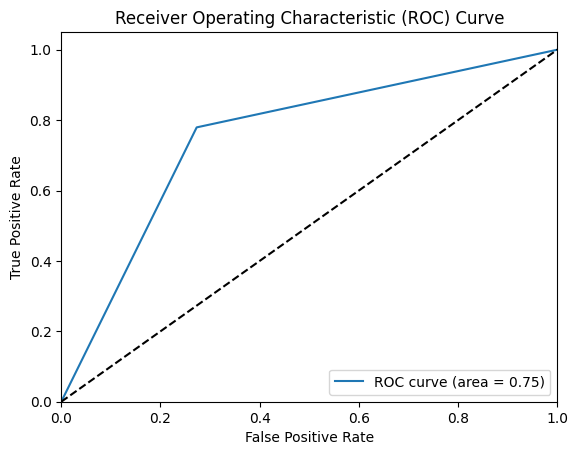

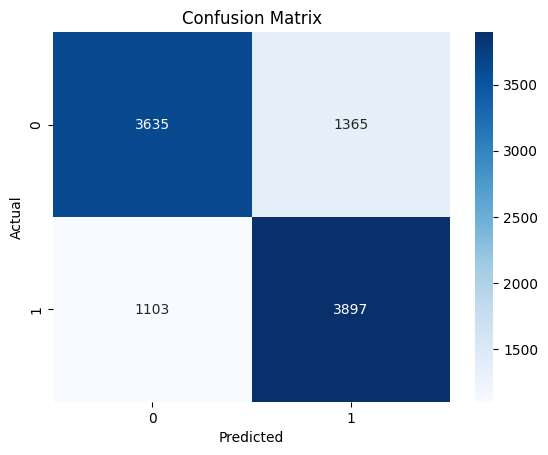

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

# ROC AUC Curve
roc_auc = roc_auc_score(y_test_binary, y_pred)
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix Plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities for the test data
y_pred_prob = model.predict(X_test_padded)

# Initialize variables to store best threshold and corresponding metrics
best_threshold = 0
best_f1_score = 0
best_precision = 0
best_recall = 0

# Vary the threshold from 0 to 1
for threshold in np.arange(0, 1.01, 0.01):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_prob > threshold).astype(int)
    
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Check if the current F1-score is better than the best F1-score
    if f1 > best_f1_score:
        best_threshold = threshold
        best_f1_score = f1
        best_precision = precision
        best_recall = recall

print("Best Threshold:", best_threshold)
print("Best F1-score:", best_f1_score)
print("Best Precision:", best_precision)
print("Best Recall:", best_recall)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Best Threshold: 0.43
Best F1-score: 0.7672581993867881
Best Precision: 0.7164671178205796
Best Recall: 0.8258


C:\python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:

# Convert probabilities to binary predictions based on the best threshold
y_pred_final = (y_pred_prob > best_threshold).astype(int)

# Print classification report and confusion matrix for the final predictions
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_final))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      5000
           1       0.72      0.83      0.77      5000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000

Confusion Matrix:
[[3366 1634]
 [ 871 4129]]


In [56]:
# Generate predicted probabilities using the loaded model
y_pred_proba = model.predict(X_test_padded).ravel()

# Threshold Adjustment
thresholds = np.arange(0.1, 1.0, 0.1)
best_threshold = 0
best_f1_score = 0

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print("Best Threshold:", best_threshold)
print("Best F1-score:", best_f1_score)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
Best Threshold: 0.4
Best F1-score: 0.7643788168808677


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      5000
           1       0.70      0.84      0.76      5000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



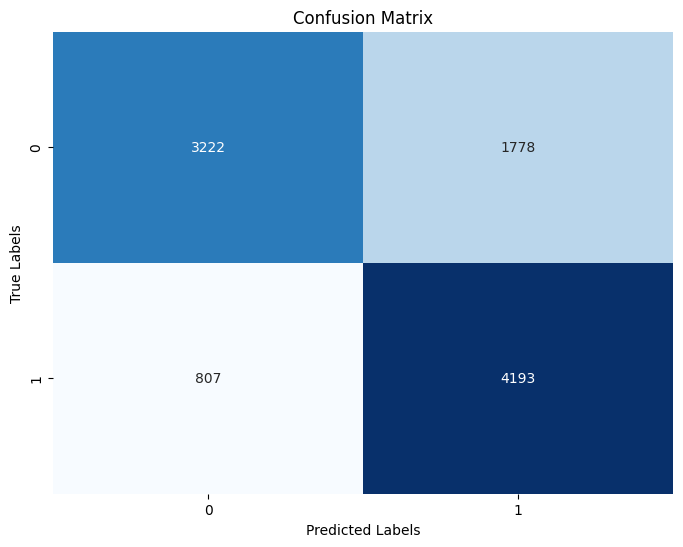

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Set the threshold
threshold = 0.4

# Predict using the chosen threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.7532 - loss: 0.5182
ACCURACY: 0.7531999945640564
LOSS: 0.5182455778121948
Available keys in history: ['accuracy', 'loss', 'val_accuracy', 'val_loss']


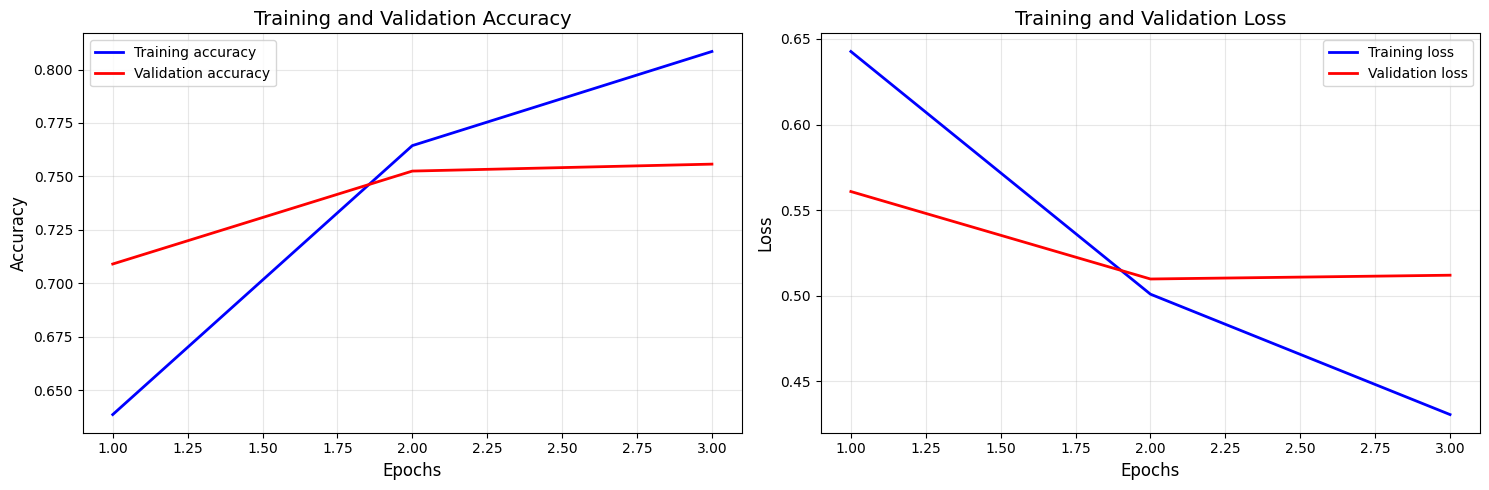

In [59]:
# Evaluation
# Evaluation - FIXED VERSION
import matplotlib.pyplot as plt
import numpy as np

# Prepare test data
X_test_sequences = tokenizer.texts_to_sequences(X_test.text)
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Evaluate the model
score = model.evaluate(X_test_padded, y_test, batch_size=512, verbose=1)
print("ACCURACY:", score[1])
print("LOSS:", score[0])

# FIXED: Use correct key names for Keras
# In newer Keras versions, keys are 'accuracy' and 'val_accuracy' instead of 'acc' and 'val_acc'
print("Available keys in history:", list(history.history.keys()))

# Use the correct keys based on what's available
if 'accuracy' in history.history:
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
elif 'acc' in history.history:
    acc = history.history['acc']
    val_acc = history.history['val_acc']
else:
    print("No accuracy keys found. Available keys:", list(history.history.keys()))
    acc = []
    val_acc = []

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training history
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'r', label='Validation accuracy', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss', linewidth=2)
plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
def predict(text, include_neutral=True):
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=MAX_SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    if(score >=0.4 and score<=0.6):
        label = "Neutral"
    if(score <=0.4):
        label = "Negative"
    if(score >=0.6):
        label = "Positive"

    return {"label" : label,
        "score": float(score)}  

In [61]:
predict("she went outside. it was raining and she was happy. but she had to come back home so that made her sad")

C:\python312\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=('Tensor(shape=(1, 300))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


C:\Users\Shank\AppData\Local\Temp\ipykernel_18428\3279050681.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "score": float(score)}


{'label': 'Negative', 'score': 0.052559494972229004}

In [63]:
predict("Today is my birthday and I am very excited for it!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


C:\Users\Shank\AppData\Local\Temp\ipykernel_18428\3279050681.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "score": float(score)}


{'label': 'Positive', 'score': 0.7933964133262634}

In [64]:

predict("Today is a good day!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


C:\Users\Shank\AppData\Local\Temp\ipykernel_18428\3279050681.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "score": float(score)}


{'label': 'Positive', 'score': 0.7658911347389221}

In [66]:
predict("This is my minor final year project, its my last day in college and i will miss coming here!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


C:\Users\Shank\AppData\Local\Temp\ipykernel_18428\3279050681.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "score": float(score)}


{'label': 'Negative', 'score': 0.06716343015432358}